In [431]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
sns.set(style="whitegrid")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn import ensemble
from sklearn.utils import shuffle


In [408]:
df = pd.read_csv('df_model.csv')

In [409]:
df = df.drop('Unnamed: 0', axis=1)

In [410]:
df.head()

,Country,iso3,Election_Type,Year,Voter_Turnout_Percentage,VAP_Turnout_Percentage,Compulsory_voting,Education index,Expected years of schooling (years),Exports and imports (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Gross national income (GNI) per capita (2011 PPP $),Human Development Index (HDI),Income index,"Infants lacking immunization, DPT (% of one-year-olds)","Infants lacking immunization, measles (% of one-year-olds)",Life expectancy at birth (years),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)",Life expectancy index,Mean years of schooling (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)","Mortality rate, under-five (per 1,000 live births)",Old-age (65 and older) dependency ratio (per 100 people ages 15-64),Population ages 15–64 (millions),Population ages 65 and older (millions),Population under age 5 (millions),Total population (millions),Urban population (%),Young age (0-14) dependency ratio (per 100 people ages 15-64)
0,Afghanistan,AFG,1,2004,83.66,67.54,0,0.302,7.9,121.1,3.5,1064.0,0.398,0.357,28.0,52.0,57.9,59.1,56.7,0.583,2.5,263.0,81.1,307.0,114.4,4.4,12.0,0.5,4.7,24.1,22.5,95.8
1,Afghanistan,AFG,0,2005,49.37,51.71,0,0.312,8.1,104.9,4.3,1138.0,0.408,0.367,24.0,50.0,58.5,59.7,57.4,0.592,2.6,256.0,78.5,300.0,110.3,4.4,12.6,0.5,4.8,25.1,22.7,94.7
2,Afghanistan,AFG,1,2009,38.80,35.06,0,0.359,9.2,56.9,0.4,1538.0,0.453,0.413,28.0,40.0,60.8,62.0,59.6,0.627,3.1,234.0,68.2,276.0,94.1,4.6,14.0,0.6,5.1,28.0,23.5,96.2
3,Afghanistan,AFG,0,2010,35.14,29.71,0,0.371,9.5,55.0,1.2,1620.0,0.463,0.421,28.0,38.0,61.2,62.5,60.1,0.634,3.2,229.0,65.7,271.0,90.2,4.6,14.4,0.7,5.2,28.8,23.7,95.8
4,Afghanistan,AFG,1,2014,38.90,50.03,0,0.406,10.4,52.3,0.2,1854.0,0.491,0.441,27.0,40.0,62.9,64.2,61.7,0.660,3.5,211.0,56.8,253.0,76.1,4.7,17.1,0.8,5.2,32.8,24.6,86.7


In [413]:
len(df.columns)

32

In [412]:
feature_columns = ['Election_Type', 'Year', 'Compulsory_voting', 'Education index',
       'Expected years of schooling (years)', 'Exports and imports (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Gross national income (GNI) per capita (2011 PPP $)',
       'Human Development Index (HDI)', 'Income index',
       'Infants lacking immunization, DPT (% of one-year-olds)',
       'Infants lacking immunization, measles (% of one-year-olds)',
       'Life expectancy at birth (years)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)', 'Life expectancy index',
       'Mean years of schooling (years)',
       'Mortality rate, female adult (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, male adult (per 1,000 people)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)',
       'Population under age 5 (millions)', 'Total population (millions)',
       'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)']

In [414]:
len(feature_columns)

28

In [357]:
# feature_columns = ['Election_Type',
#  'Year',
#  'Compulsory_voting',
#  'Education index',
#  'Expected years of schooling (years)',
#  'Exports and imports (% of GDP)',
#  'Gross national income (GNI) per capita (2011 PPP $)',
#  'Human Development Index (HDI)',
#  'Income index',
#  'Life expectancy at birth (years)',
#  'Life expectancy at birth, female (years)',
#  'Life expectancy at birth, male (years)',
#  'Life expectancy index',
#  'Mean years of schooling (years)',
#  'Mortality rate, female adult (per 1,000 people)',
#  'Mortality rate, infant (per 1,000 live births)',
#  'Mortality rate, male adult (per 1,000 people)',
#  'Mortality rate, under-five (per 1,000 live births)',
#  'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)']

### Predicting How Many Voters that are Registered will Vote

In [415]:
target = df['Voter_Turnout_Percentage']
features = df[feature_columns]

In [416]:
features

,Election_Type,Year,Compulsory_voting,Education index,Expected years of schooling (years),Exports and imports (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Gross national income (GNI) per capita (2011 PPP $),Human Development Index (HDI),Income index,"Infants lacking immunization, DPT (% of one-year-olds)","Infants lacking immunization, measles (% of one-year-olds)",Life expectancy at birth (years),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)",Life expectancy index,Mean years of schooling (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)","Mortality rate, under-five (per 1,000 live births)",Old-age (65 and older) dependency ratio (per 100 people ages 15-64),Population ages 15–64 (millions),Population ages 65 and older (millions),Population under age 5 (millions),Total population (millions),Urban population (%),Young age (0-14) dependency ratio (per 100 people ages 15-64)
0,1,2004,0,0.302,7.9,121.1,3.5,1064.0,0.398,0.357,28.0,52.0,57.9,59.1,56.7,0.583,2.5,263.0,81.1,307.0,114.4,4.4,12.0,0.5,4.7,24.1,22.5,95.8
1,0,2005,0,0.312,8.1,104.9,4.3,1138.0,0.408,0.367,24.0,50.0,58.5,59.7,57.4,0.592,2.6,256.0,78.5,300.0,110.3,4.4,12.6,0.5,4.8,25.1,22.7,94.7
2,1,2009,0,0.359,9.2,56.9,0.4,1538.0,0.453,0.413,28.0,40.0,60.8,62.0,59.6,0.627,3.1,234.0,68.2,276.0,94.1,4.6,14.0,0.6,5.1,28.0,23.5,96.2
3,0,2010,0,0.371,9.5,55.0,1.2,1620.0,0.463,0.421,28.0,38.0,61.2,62.5,60.1,0.634,3.2,229.0,65.7,271.0,90.2,4.6,14.4,0.7,5.2,28.8,23.7,95.8
4,1,2014,0,0.406,10.4,52.3,0.2,1854.0,0.491,0.441,27.0,40.0,62.9,64.2,61.7,0.660,3.5,211.0,56.8,253.0,76.1,4.7,17.1,0.8,5.2,32.8,24.6,86.7
5,0,1992,0,0.558,10.7,100.0,2.8,2925.0,0.610,0.510,3.0,13.0,71.8,75.0,69.0,0.797,7.8,77.0,32.1,150.0,36.9,9.5,2.0,0.2,0.4,3.2,37.2,53.6
6,0,1996,0,0.558,10.3,43.2,2.7,4793.0,0.641,0.585,2.0,8.0,72.5,75.6,69.6,0.808,8.2,73.0,27.7,142.0,31.5,10.7,1.9,0.2,0.3,3.1,39.5,52.4
7,0,1997,0,0.571,10.6,43.9,2.0,4290.0,0.641,0.568,1.0,5.0,72.8,75.9,70.0,0.813,8.3,72.0,26.6,140.0,30.1,10.9,1.9,0.2,0.3,3.1,40.0,51.4
8,0,2001,0,0.589,10.7,57.4,5.1,6336.0,0.676,0.627,3.0,5.0,74.3,77.3,71.6,0.835,8.7,63.0,22.0,119.0,24.8,11.6,2.0,0.2,0.3,3.1,42.4,46.9
9,0,2005,0,0.623,11.5,70.3,3.2,7862.0,0.704,0.659,1.0,3.0,75.2,78.2,72.7,0.849,9.1,60.0,18.2,109.0,20.4,13.1,2.0,0.3,0.2,3.1,46.7,40.7


In [417]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

### Standardizing the Data

In [418]:
scaler = StandardScaler()
scaler.fit(X_train)
features = pd.DataFrame(data=scaler.transform(features), columns=feature_columns)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=feature_columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=feature_columns)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [419]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,Election_Type,Year,Compulsory_voting,Education index,Expected years of schooling (years),Exports and imports (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Gross national income (GNI) per capita (2011 PPP $),Human Development Index (HDI),Income index,"Infants lacking immunization, DPT (% of one-year-olds)","Infants lacking immunization, measles (% of one-year-olds)",Life expectancy at birth (years),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)",Life expectancy index,Mean years of schooling (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)","Mortality rate, under-five (per 1,000 live births)",Old-age (65 and older) dependency ratio (per 100 people ages 15-64),Population ages 15–64 (millions),Population ages 65 and older (millions),Population under age 5 (millions),Total population (millions),Urban population (%),Young age (0-14) dependency ratio (per 100 people ages 15-64)
Election_Type,NaN,0.05159,0.030053,0.211139,0.204288,0.067787,0.010215,0.244020,0.239470,0.244157,0.158593,0.139263,0.236445,0.230759,0.239097,0.236440,0.202257,0.214854,0.212918,0.219720,0.206685,0.212924,0.064463,0.097067,0.037463,0.060956,0.159211,0.220853
Year,NaN,NaN,0.044032,0.234372,0.269308,0.171685,0.106861,0.099902,0.175677,0.087509,0.102360,0.210296,0.156926,0.135481,0.176619,0.156706,0.188354,0.084697,0.183101,0.141025,0.182186,0.055793,0.039911,0.031306,0.047044,0.043728,0.061955,0.140365
Compulsory_voting,NaN,NaN,NaN,0.097330,0.163320,0.007708,0.014404,0.080192,0.183617,0.198792,0.118972,0.163668,0.255793,0.248144,0.262959,0.255817,0.040610,0.222788,0.195258,0.253268,0.204495,0.028581,0.009766,0.034840,0.004147,0.006279,0.355980,0.098659
Education index,NaN,NaN,NaN,NaN,0.949841,0.210015,0.060449,0.695084,0.954317,0.845513,0.582476,0.640197,0.817614,0.837465,0.783007,0.817677,0.966857,0.702053,0.858435,0.570830,0.841608,0.765191,0.029541,0.227387,0.104053,0.006786,0.689011,0.868495
Expected years of schooling (years),NaN,NaN,NaN,NaN,NaN,0.164306,0.055916,0.701888,0.934805,0.843995,0.585742,0.634236,0.822803,0.833164,0.798108,0.822833,0.839694,0.690202,0.852172,0.597490,0.837577,0.737956,0.025722,0.201914,0.098004,0.004217,0.704925,0.826635
Exports and imports (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,0.353891,0.240542,0.215530,0.209047,0.163009,0.185518,0.194030,0.190716,0.196190,0.193945,0.233822,0.170570,0.222851,0.151519,0.218609,0.090167,0.257737,0.286259,0.229797,0.256925,0.148537,0.231848
"Foreign direct investment, net inflows (% of GDP)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050802,0.042022,0.013396,0.003065,0.017766,0.044757,0.036836,0.052536,0.044626,0.061118,0.039171,0.039125,0.056043,0.045451,0.019030,0.086647,0.097395,0.076381,0.086328,0.084051,0.047141
Gross national income (GNI) per capita (2011 PPP $),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.788603,0.863162,0.360869,0.354338,0.688291,0.667210,0.699766,0.688321,0.639940,0.580493,0.633770,0.617140,0.577909,0.660301,0.063965,0.279545,0.059588,0.045159,0.696409,0.680630
Human Development Index (HDI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.951408,0.598852,0.641714,0.925405,0.933225,0.902910,0.925453,0.898548,0.823856,0.923219,0.726168,0.900810,0.777849,0.046628,0.241585,0.089860,0.023452,0.770434,0.909828
Income index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502090,0.532237,0.859842,0.861659,0.845137,0.859906,0.782939,0.762279,0.846053,0.695044,0.810079,0.733291,0.064876,0.255763,0.066989,0.042860,0.796532,0.858970


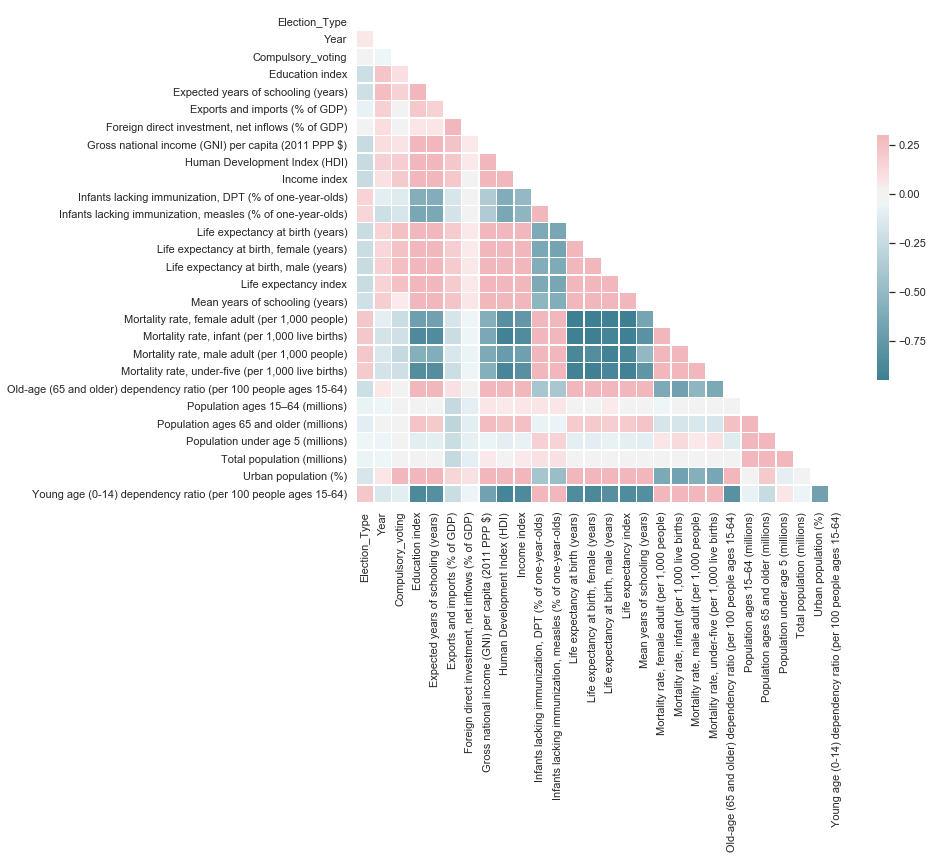

In [420]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature Selection

In [421]:
len(X_train.columns)

28

In [422]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

In [423]:
len(X_train.columns)

19

In [425]:
X_train.columns

Index(['Election_Type', 'Year', 'Compulsory_voting', 'Education index',
       'Expected years of schooling (years)', 'Exports and imports (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Gross national income (GNI) per capita (2011 PPP $)',
       'Infants lacking immunization, DPT (% of one-year-olds)',
       'Infants lacking immunization, measles (% of one-year-olds)',
       'Life expectancy at birth (years)',
       'Mortality rate, female adult (per 1,000 people)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, male adult (per 1,000 people)',
       'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
       'Population ages 15–64 (millions)',
       'Population ages 65 and older (millions)', 'Urban population (%)',
       'Young age (0-14) dependency ratio (per 100 people ages 15-64)'],
      dtype='object')

In [405]:
# from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

# selector = SelectKBest(f_regression, k=10)

# selector.fit(standard_X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x1a1c2c02f0>)

In [406]:
# selected_columns = X_train.columns[selector.get_support()]
# removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[feature_columns]
# X_test = X_test[feature_columns]

KeyError: "['Mortality rate, under-five (per 1,000 live births)', 'Human Development Index (HDI)', 'Life expectancy index', 'Life expectancy at birth, female (years)', 'Income index', 'Total population (millions)', 'Mean years of schooling (years)', 'Life expectancy at birth, male (years)', 'Population under age 5 (millions)'] not in index"

In [265]:
# list(removed_columns)

['Education index',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Life expectancy at birth (years)',
 'Mortality rate, female adult (per 1,000 people)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, male adult (per 1,000 people)',
 'Population ages 15–64 (millions)',
 'Population ages 65 and older (millions)',
 'Young age (0-14) dependency ratio (per 100 people ages 15-64)']

In [266]:
# list(selected_columns)

['Election_Type',
 'Year',
 'Compulsory_voting',
 'Expected years of schooling (years)',
 'Exports and imports (% of GDP)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Infants lacking immunization, DPT (% of one-year-olds)',
 'Infants lacking immunization, measles (% of one-year-olds)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
 'Urban population (%)']

In [267]:
# from sklearn.feature_selection import RFECV

In [268]:
# ols = linear_model.LinearRegression()

In [269]:
# Create recursive feature eliminator that scores features by mean squared errors
# selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
# selector.fit(X_train, y_train)


RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [270]:
# selected_columns = X_train.columns[selector.support_]
# removed_columns = X_train.columns[~selector.support_]

In [271]:
# list(removed_columns)

['Election_Type',
 'Foreign direct investment, net inflows (% of GDP)',
 'Infants lacking immunization, DPT (% of one-year-olds)',
 'Infants lacking immunization, measles (% of one-year-olds)',
 'Urban population (%)']

In [272]:
# len(list(selected_columns))

5

In [273]:
# list(selected_columns)

['Year',
 'Compulsory_voting',
 'Expected years of schooling (years)',
 'Exports and imports (% of GDP)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)']

In [399]:
X_train.head()

,Election_Type,Year,Compulsory_voting,Education index,Expected years of schooling (years),Exports and imports (% of GDP),"Foreign direct investment, net inflows (% of GDP)",Gross national income (GNI) per capita (2011 PPP $),"Infants lacking immunization, DPT (% of one-year-olds)","Infants lacking immunization, measles (% of one-year-olds)",Life expectancy at birth (years),"Mortality rate, female adult (per 1,000 people)","Mortality rate, infant (per 1,000 live births)","Mortality rate, male adult (per 1,000 people)",Old-age (65 and older) dependency ratio (per 100 people ages 15-64),Population ages 15–64 (millions),Population ages 65 and older (millions),Urban population (%),Young age (0-14) dependency ratio (per 100 people ages 15-64)
0,-0.661898,-1.031983,-0.482099,0.261449,-0.027444,0.813220,0.087327,-0.572732,-0.649026,-0.656638,0.191520,-0.254934,-0.174746,-0.610873,-1.017791,-0.329800,-0.414438,0.987699,0.867253
1,1.510808,-0.067306,-0.482099,0.705346,0.456087,1.223233,0.325755,0.169921,-0.649026,-0.920647,0.500778,-0.626255,-0.772739,-0.241396,0.391549,-0.309627,-0.337248,-0.056119,-1.036488
2,-0.661898,1.586426,2.074262,0.433786,0.425866,-0.772164,-0.071625,-0.246723,-0.141007,-0.194623,0.596754,-0.499463,-0.612383,-0.636650,-0.319470,0.002143,-0.090239,0.955225,-0.306789
3,-0.661898,-0.894172,-0.482099,1.363358,1.060501,-1.245255,-0.253285,1.841500,-0.547422,-0.458632,0.756715,-0.590029,-0.766057,-0.696798,0.734361,2.936443,4.865369,0.996977,-0.669600
4,-0.661898,-1.031983,2.074262,-1.091131,-0.903844,0.335923,-0.185162,-0.801524,-0.344215,-0.260626,0.031559,0.016764,0.135943,-0.172656,-0.814643,-0.320631,-0.399000,-0.603544,1.344207


In [330]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

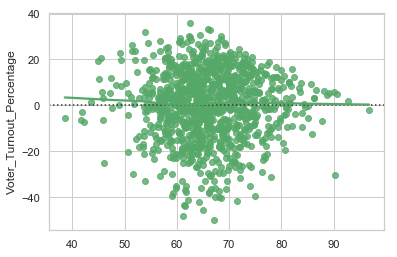

In [331]:
sns.residplot(y_train_pred, y_train, lowess=True, color="g")

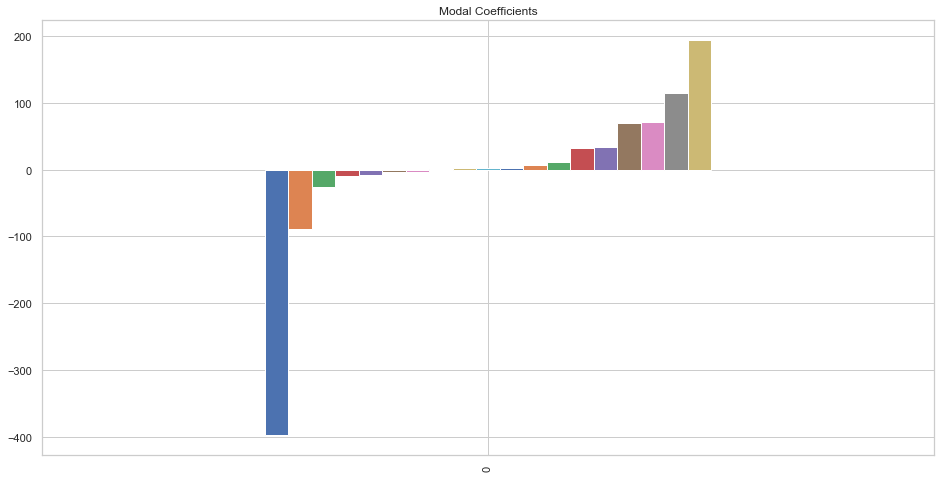

In [332]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = X_train.columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [333]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.05, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 12.2478707827249
Testing Error: 16.198947183458486


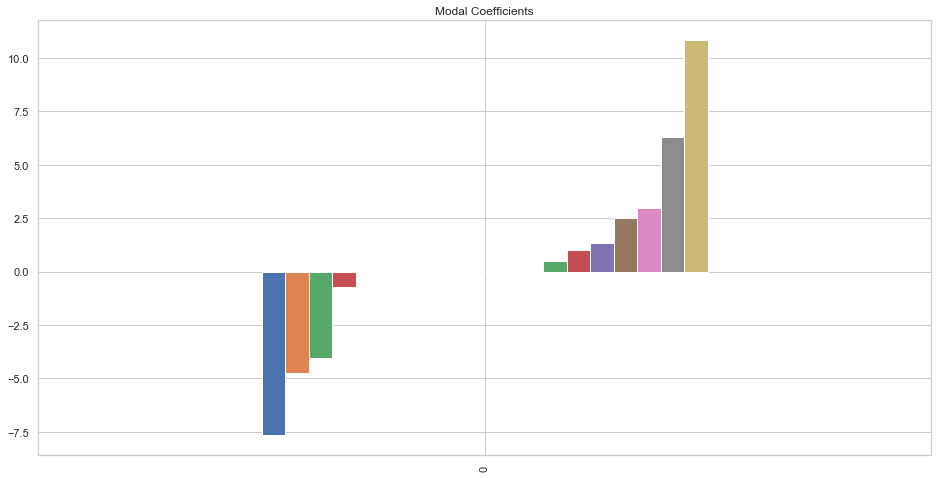

In [334]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [335]:
lasso_coef01.T

,0
"Mortality rate, under-five (per 1,000 live births)",-7.661511
Old-age (65 and older) dependency ratio (per 100 people ages 15-64),-4.737833
Year,-4.056194
"Mortality rate, female adult (per 1,000 people)",-0.719004
"Mortality rate, male adult (per 1,000 people)",-0.000000
Life expectancy index,-0.000000
"Life expectancy at birth, male (years)",-0.000000
"Life expectancy at birth, female (years)",0.000000
Life expectancy at birth (years),-0.000000
Human Development Index (HDI),0.000000


In [336]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 12.174059403253139
Testing Error: 16.13907913808701


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


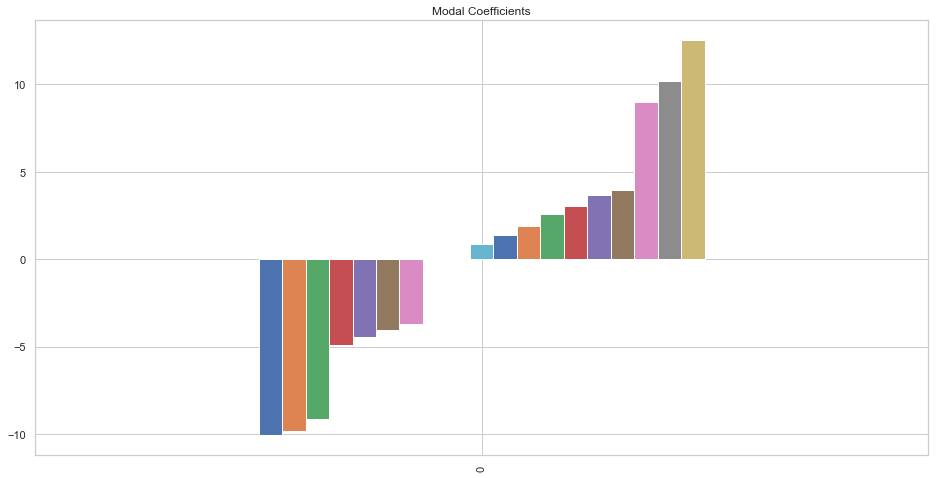

In [337]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [338]:
lasso_coef01.T

,0
"Mortality rate, under-five (per 1,000 live births)",-10.080383
Education index,-9.832619
"Life expectancy at birth, male (years)",-9.160255
Old-age (65 and older) dependency ratio (per 100 people ages 15-64),-4.893080
Income index,-4.433936
Year,-4.052012
"Mortality rate, male adult (per 1,000 people)",-3.720932
Life expectancy index,-0.000000
Life expectancy at birth (years),-0.000000
"Mortality rate, female adult (per 1,000 people)",0.866985


In [339]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 12.282724604138137
Testing Error: 16.18184319950104


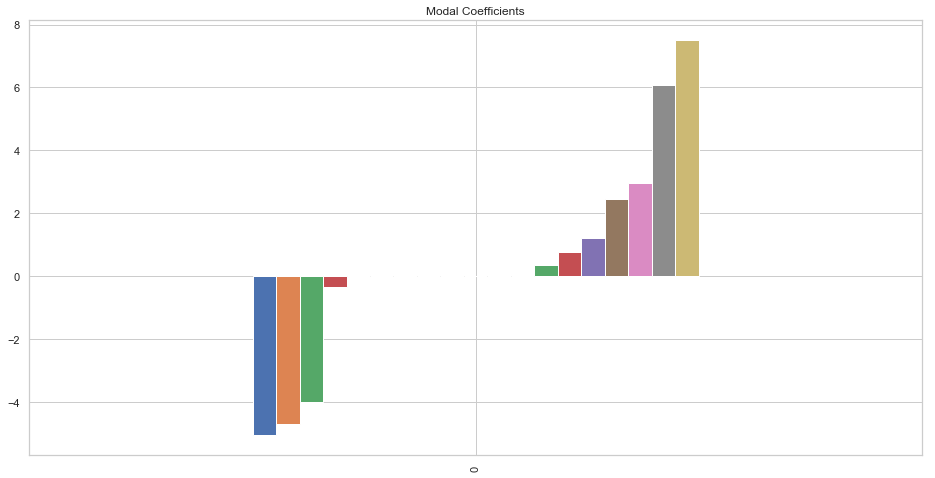

In [340]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [341]:
lasso_coef01.T

,0
"Mortality rate, under-five (per 1,000 live births)",-5.060110
Old-age (65 and older) dependency ratio (per 100 people ages 15-64),-4.703558
Year,-3.991213
"Mortality rate, female adult (per 1,000 people)",-0.339587
"Mortality rate, male adult (per 1,000 people)",-0.000000
Life expectancy index,0.000000
"Life expectancy at birth, male (years)",0.000000
"Life expectancy at birth, female (years)",0.000000
Life expectancy at birth (years),0.000000
Human Development Index (HDI),0.000000


## Multiple Linear Regression Baseline

In [289]:
X = df[['Election_Type',
 'Year',
 'Compulsory_voting',
 'Education index',
 'Expected years of schooling (years)',
 'Exports and imports (% of GDP)',
 'Foreign direct investment, net inflows (% of GDP)',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Human Development Index (HDI)',
 'Income index',
 'Infants lacking immunization, DPT (% of one-year-olds)',
 'Infants lacking immunization, measles (% of one-year-olds)',
 'Life expectancy at birth (years)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy index',
 'Mean years of schooling (years)',
 'Mortality rate, female adult (per 1,000 people)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, male adult (per 1,000 people)',
 'Mortality rate, under-five (per 1,000 live births)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
 'Population ages 15–64 (millions)',
 'Population ages 65 and older (millions)',
 'Population under age 5 (millions)',
 'Total population (millions)',
 'Urban population (%)',
 'Young age (0-14) dependency ratio (per 100 people ages 15-64)']]
y = target

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Voter_Turnout_Percentage   R-squared:                       0.951
Model:                                  OLS   Adj. R-squared:                  0.950
Method:                       Least Squares   F-statistic:                     884.5
Date:                      Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                              13:57:24   Log-Likelihood:                -5344.4
No. Observations:                      1293   AIC:                         1.074e+04
Df Residuals:                          1265   BIC:                         1.089e+04
Df Model:                                28                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Election_Type                                                           3.7555      0.972      3.862      0.000       1.848       5.663
Year                                                                   -0.4698      0.063     -7.437      0.000      -0.594      -0.346
Compulsory_voting                                                       5.8460      1.369      4.270      0.000       3.160       8.532
Education index                                                      -431.1777    106.820     -4.036      0.000    -640.741    -221.614
Expected years of schooling (years)                                    10.2760      2.373      4.330      0.000       5.620      14.932
Exports and imports (% of GDP)                                          0.0510      0.011      4.457      0.000       0.029       0.073
Foreign direct investment, net inflows (% of GDP)                       0.0164      0.053      0.311      0.756      -0.087       0.120
Gross national income (GNI) per capita (2011 PPP $)                     0.0002   7.68e-05      2.497      0.013    4.11e-05       0.000
Human Development Index (HDI)                                         276.2692    119.066      2.320      0.020      42.681     509.857
Income index                                                         -106.6891     41.289     -2.584      0.010    -187.692     -25.686
Infants lacking immunization, DPT (% of one-year-olds)                 -0.0988      0.088     -1.122      0.262      -0.272       0.074
Infants lacking immunization, measles (% of one-year-olds)             -0.0346      0.062     -0.561      0.575      -0.155       0.086
Life expectancy at birth (years)                                       36.8026      8.495      4.332      0.000      20.137      53.468
Life expectancy at birth, female (years)                                9.7052      3.237      2.999      0.003       3.356      16.055
Life expectancy at birth, male (years)                                  5.5723      3.091      1.803      0.072      -0.492      11.636
Life expectancy index                                               -3511.2513    411.717     -8.528      0.000   -4318.974   -2703.529
Mean years of schooling (years)                                        11.1527      2.991      3.729      0.000       5.285      17.020
Mortality rate, female adult (per 1,000 people)                         0.0877      0.035      2.514      0.012       0.019       0.156
Mortality rate, infant (per 1,000 live births)                          0.3202      0.089      3.610      0.000       0.146       0.494
Mortality rate, male adul

### I will remove the features with a p-value of over 0.05. I also want to test the feature Life Expectancy Index with it in and with it out. The coefficient value is unexpectedly high since it was consistently eliminated by Lasso. 

In [290]:
X = df[['Election_Type',
 'Year',
 'Compulsory_voting',
 'Education index',
 'Expected years of schooling (years)',
 'Exports and imports (% of GDP)',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Human Development Index (HDI)',
 'Income index',
 'Life expectancy at birth (years)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy index',
 'Mean years of schooling (years)',
 'Mortality rate, female adult (per 1,000 people)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, male adult (per 1,000 people)',
 'Mortality rate, under-five (per 1,000 live births)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',]]
y = target

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Voter_Turnout_Percentage   R-squared:                       0.951
Model:                                  OLS   Adj. R-squared:                  0.950
Method:                       Least Squares   F-statistic:                     1291.
Date:                      Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                              13:57:51   Log-Likelihood:                -5354.7
No. Observations:                      1293   AIC:                         1.075e+04
Df Residuals:                          1274   BIC:                         1.085e+04
Df Model:                                19                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Election_Type                                                           3.6541      0.970      3.767      0.000       1.751       5.557
Year                                                                   -0.4657      0.061     -7.608      0.000      -0.586      -0.346
Compulsory_voting                                                       5.4745      1.303      4.203      0.000       2.919       8.030
Education index                                                      -435.9013    106.395     -4.097      0.000    -644.631    -227.172
Expected years of schooling (years)                                     9.8288      2.357      4.170      0.000       5.204      14.453
Exports and imports (% of GDP)                                          0.0524      0.010      5.394      0.000       0.033       0.072
Gross national income (GNI) per capita (2011 PPP $)                     0.0002   7.35e-05      3.108      0.002    8.42e-05       0.000
Human Development Index (HDI)                                         330.0695    117.529      2.808      0.005      99.498     560.641
Income index                                                         -128.4866     40.925     -3.140      0.002    -208.774     -48.199
Life expectancy at birth (years)                                       33.1898      8.336      3.982      0.000      16.836      49.543
Life expectancy at birth, female (years)                               10.8801      3.200      3.400      0.001       4.602      17.158
Life expectancy at birth, male (years)                                  6.6003      3.075      2.146      0.032       0.567      12.633
Life expectancy index                                               -3419.3620    399.088     -8.568      0.000   -4202.303   -2636.421
Mean years of schooling (years)                                        10.7050      2.980      3.593      0.000       4.859      16.551
Mortality rate, female adult (per 1,000 people)                         0.0788      0.033      2.384      0.017       0.014       0.144
Mortality rate, infant (per 1,000 live births)                          0.2973      0.086      3.469      0.001       0.129       0.465
Mortality rate, male adult (per 1,000 people)                          -0.1046      0.033     -3.210      0.001      -0.169      -0.041
Mortality rate, under-five (per 1,000 live births)                     -0.1591      0.052     -3.034      0.002      -0.262      -0.056
Old-age (65 and older) dependency ratio (per 100 people ages 15-64)    -0.5588      0.112     -4.991      0.000      -0.778      -0.339
=========================

### As expected, the r-squared value hasn't changed. Those features are not predictive. Now to test the model without life expectancy index. 

In [291]:
X = df[['Election_Type',
 'Year',
 'Compulsory_voting',
 'Education index',
 'Expected years of schooling (years)',
 'Exports and imports (% of GDP)',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Human Development Index (HDI)',
 'Income index',
 'Life expectancy at birth (years)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Mean years of schooling (years)',
 'Mortality rate, female adult (per 1,000 people)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, male adult (per 1,000 people)',
 'Mortality rate, under-five (per 1,000 live births)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',]]
y = target

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Voter_Turnout_Percentage   R-squared:                       0.948
Model:                                  OLS   Adj. R-squared:                  0.947
Method:                       Least Squares   F-statistic:                     1286.
Date:                      Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                              13:57:58   Log-Likelihood:                -5390.9
No. Observations:                      1293   AIC:                         1.082e+04
Df Residuals:                          1275   BIC:                         1.091e+04
Df Model:                                18                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Election_Type                                                           2.9273      0.993      2.947      0.003       0.978       4.876
Year                                                                    0.0403      0.017      2.438      0.015       0.008       0.073
Compulsory_voting                                                       5.7550      1.339      4.299      0.000       3.129       8.381
Education index                                                      -478.0002    109.258     -4.375      0.000    -692.346    -263.655
Expected years of schooling (years)                                    10.4639      2.422      4.320      0.000       5.712      15.216
Exports and imports (% of GDP)                                          0.0441      0.010      4.433      0.000       0.025       0.064
Gross national income (GNI) per capita (2011 PPP $)                     0.0002   7.55e-05      2.748      0.006    5.93e-05       0.000
Human Development Index (HDI)                                         305.0460    120.783      2.526      0.012      68.090     542.001
Income index                                                         -107.1663     41.993     -2.552      0.011    -189.550     -24.783
Life expectancy at birth (years)                                      -15.2715      6.295     -2.426      0.015     -27.621      -2.922
Life expectancy at birth, female (years)                                9.4364      3.285      2.872      0.004       2.992      15.881
Life expectancy at birth, male (years)                                  4.4558      3.151      1.414      0.158      -1.726      10.637
Mean years of schooling (years)                                        12.2697      3.057      4.013      0.000       6.272      18.268
Mortality rate, female adult (per 1,000 people)                         0.0801      0.034      2.358      0.019       0.013       0.147
Mortality rate, infant (per 1,000 live births)                          0.3867      0.087      4.422      0.000       0.215       0.558
Mortality rate, male adult (per 1,000 people)                          -0.0895      0.033     -2.677      0.008      -0.155      -0.024
Mortality rate, under-five (per 1,000 live births)                     -0.1571      0.054     -2.914      0.004      -0.263      -0.051
Old-age (65 and older) dependency ratio (per 100 people ages 15-64)    -0.5508      0.115     -4.786      0.000      -0.777      -0.325
==============================================================================
Omnibus:                       39.426   Durbin-Watson:                   1.115
Pro

### An r-squared value that isn't as high came up. I'll leave the life expectancy index in for now.

In [292]:
X = df[['Education index',
 'Expected years of schooling (years)',
 'Human Development Index (HDI)',
 'Life expectancy at birth, male (years)',
 'Life expectancy index',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, male adult (per 1,000 people)',
 'Mortality rate, under-five (per 1,000 live births)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',]]
y = target

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Voter_Turnout_Percentage   R-squared:                       0.944
Model:                                  OLS   Adj. R-squared:                  0.943
Method:                       Least Squares   F-statistic:                     2384.
Date:                      Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                              13:58:08   Log-Likelihood:                -5441.4
No. Observations:                      1293   AIC:                         1.090e+04
Df Residuals:                          1284   BIC:                         1.095e+04
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Education index                                                       -14.6278     11.629     -1.258      0.209     -37.441       8.185
Expected years of schooling (years)                                     1.1477      0.467      2.460      0.014       0.232       2.063
Human Development Index (HDI)                                          45.5204     17.500      2.601      0.009      11.188      79.852
Life expectancy at birth, male (years)                                 -0.3011      0.455     -0.661      0.509      -1.194       0.592
Life expectancy index                                                  63.7878     38.762      1.646      0.100     -12.255     139.831
Mortality rate, infant (per 1,000 live births)                          0.4535      0.086      5.249      0.000       0.284       0.623
Mortality rate, male adult (per 1,000 people)                           0.0176      0.006      2.799      0.005       0.005       0.030
Mortality rate, under-five (per 1,000 live births)                     -0.1209      0.050     -2.408      0.016      -0.219      -0.022
Old-age (65 and older) dependency ratio (per 100 people ages 15-64)    -0.7920      0.105     -7.568      0.000      -0.997      -0.587
==============================================================================
Omnibus:                       36.921   Durbin-Watson:                   1.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.272
Skew:                          -0.418   Prob(JB):                     2.97e-09
Kurtosis:                       2.824   Cond. No.                     2.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The r-squared is still even lower. I tested each feature individually but all of them benefit the R-Squared value. I will keep all of these features for now in my models.

In [317]:
X = df[['Election_Type',
 'Year',
 'Compulsory_voting',
 'Education index',
 'Expected years of schooling (years)',
 'Exports and imports (% of GDP)',
 'Gross national income (GNI) per capita (2011 PPP $)',
 'Human Development Index (HDI)',
 'Income index',
 'Life expectancy at birth (years)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy index',
 'Mean years of schooling (years)',
 'Mortality rate, female adult (per 1,000 people)',
 'Mortality rate, infant (per 1,000 live births)',
 'Mortality rate, male adult (per 1,000 people)',
 'Mortality rate, under-five (per 1,000 live births)',
 'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)']]
y = target

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Voter_Turnout_Percentage   R-squared:                       0.951
Model:                                  OLS   Adj. R-squared:                  0.950
Method:                       Least Squares   F-statistic:                     1291.
Date:                      Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                              14:26:49   Log-Likelihood:                -5354.7
No. Observations:                      1293   AIC:                         1.075e+04
Df Residuals:                          1274   BIC:                         1.085e+04
Df Model:                                19                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Election_Type                                                           3.6541      0.970      3.767      0.000       1.751       5.557
Year                                                                   -0.4657      0.061     -7.608      0.000      -0.586      -0.346
Compulsory_voting                                                       5.4745      1.303      4.203      0.000       2.919       8.030
Education index                                                      -435.9013    106.395     -4.097      0.000    -644.631    -227.172
Expected years of schooling (years)                                     9.8288      2.357      4.170      0.000       5.204      14.453
Exports and imports (% of GDP)                                          0.0524      0.010      5.394      0.000       0.033       0.072
Gross national income (GNI) per capita (2011 PPP $)                     0.0002   7.35e-05      3.108      0.002    8.42e-05       0.000
Human Development Index (HDI)                                         330.0695    117.529      2.808      0.005      99.498     560.641
Income index                                                         -128.4866     40.925     -3.140      0.002    -208.774     -48.199
Life expectancy at birth (years)                                       33.1898      8.336      3.982      0.000      16.836      49.543
Life expectancy at birth, female (years)                               10.8801      3.200      3.400      0.001       4.602      17.158
Life expectancy at birth, male (years)                                  6.6003      3.075      2.146      0.032       0.567      12.633
Life expectancy index                                               -3419.3620    399.088     -8.568      0.000   -4202.303   -2636.421
Mean years of schooling (years)                                        10.7050      2.980      3.593      0.000       4.859      16.551
Mortality rate, female adult (per 1,000 people)                         0.0788      0.033      2.384      0.017       0.014       0.144
Mortality rate, infant (per 1,000 live births)                          0.2973      0.086      3.469      0.001       0.129       0.465
Mortality rate, male adult (per 1,000 people)                          -0.1046      0.033     -3.210      0.001      -0.169      -0.041
Mortality rate, under-five (per 1,000 live births)                     -0.1591      0.052     -3.034      0.002      -0.262      -0.056
Old-age (65 and older) dependency ratio (per 100 people ages 15-64)    -0.5588      0.112     -4.991      0.000      -0.778      -0.339
=========================

## Random Forest

In [342]:
len(X_train.columns)

19

In [343]:
# 20 trees
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [313]:
# Results from 19 selected features, 20 trees
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.124446975546975
Mean Squared Error: 196.9205656444718
Root Mean Squared Error: 14.032838830559973


In [344]:
# Results from features with highest R-Squared values, 20 trees
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.142516763191765
Mean Squared Error: 205.0610046946485
Root Mean Squared Error: 14.319951281154852


In [426]:
# 1000 Trees!
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [315]:
# Results from features that were selected from k-best and multicollinearity elimination, 1000 trees
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.466571420573633
Mean Squared Error: 177.4317510066688
Root Mean Squared Error: 13.32035100913894


In [346]:
# Results from features that were selected with highest R-Square value, 1000 trees
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.733698126631738
Mean Squared Error: 193.43587117500152
Root Mean Squared Error: 13.908122489214765


In [400]:
# 1000 Trees!
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

### Winning Model Right Here 

In [401]:
# Results from features that were selected from k-best and multicollinearity elimination, 1000 trees
# Features = 19
# 'Election_Type', 'Year', 'Compulsory_voting', 'Education index',
#        'Expected years of schooling (years)', 'Exports and imports (% of GDP)',
#        'Foreign direct investment, net inflows (% of GDP)',
#        'Gross national income (GNI) per capita (2011 PPP $)',
#       'Infants lacking immunization, DPT (% of one-year-olds)',
#        'Infants lacking immunization, measles (% of one-year-olds)',
#        'Life expectancy at birth (years)',
#        'Mortality rate, female adult (per 1,000 people)',
#        'Mortality rate, infant (per 1,000 live births)',
#        'Mortality rate, male adult (per 1,000 people)',
#        'Old-age (65 and older) dependency ratio (per 100 people ages 15-64)',
#        'Population ages 15–64 (millions)',
#        'Population ages 65 and older (millions)', 'Urban population (%)',
#        'Young age (0-14) dependency ratio (per 100 people ages 15-64)']
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.25590988481338
Mean Squared Error: 167.45371047242102
Root Mean Squared Error: 12.940390661507132


In [429]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

### Ranking features for voter turnout of registered voters

In [430]:
feature_importances

,importance
Urban population (%),0.119253
Young age (0-14) dependency ratio (per 100 people ages 15-64),0.083716
Exports and imports (% of GDP),0.071403
Education index,0.069099
Population ages 15–64 (millions),0.065622
Year,0.061261
Old-age (65 and older) dependency ratio (per 100 people ages 15-64),0.059162
Gross national income (GNI) per capita (2011 PPP $),0.057911
Expected years of schooling (years),0.049897
Population ages 65 and older (millions),0.049529


### Gradient Boost

In [432]:
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [433]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 402.2312


Text(0, 0.5, 'Deviance')

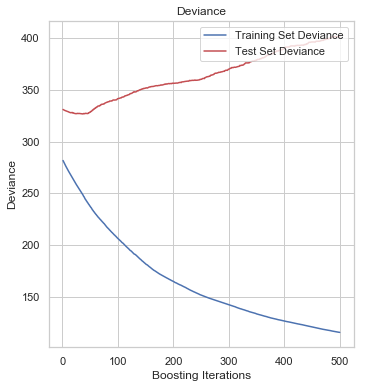

In [434]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

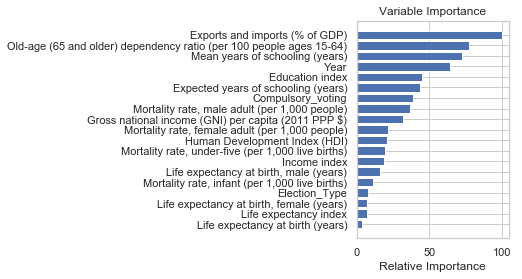

In [436]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()